<a href="https://colab.research.google.com/github/AkhandSingh96/Stock-Market-Prediction-Using-Deep-Learning-/blob/main/StockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the directory and importing libraries

In [ ]:
cd /content/drive/MyDrive/Deep Learning Project

/content/drive/MyDrive/Deep Learning Project


In [ ]:
ls

'Copy of LSTM.ipynb'    GRU.ipynb                    StockPredictionLSTM.ipynb
'Data Analysis.ipynb'  'Project Update.gdoc'         StockRNNipynb
 get_prices.ipynb       StockPredictionARIMA.ipynb


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# Dataset preparation and preprocessing

In [ ]:
tech_list = ['AAPL', 'GE', 'TSLA', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Features extracted from stock market data.

In [ ]:
company_list = [AAPL, GE, TSLA, AMZN]
company_name = ["APPLE", "GE", "TESLA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-05,3354.699951,3264.360107,3338.860107,3270.540039,3711300.0,3270.540039,AMAZON
2021-05-06,3314.399902,3247.199951,3270.000000,3306.370117,4447700.0,3306.370117,AMAZON
2021-05-07,3330.889893,3289.070068,3319.090088,3291.610107,4706800.0,3291.610107,AMAZON
2021-05-10,3283.000000,3190.000000,3282.320068,3190.489990,5838600.0,3190.489990,AMAZON
2021-05-11,3238.000000,3127.370117,3136.280029,3223.909912,4619800.0,3223.909912,AMAZON
2021-05-12,3207.939941,3133.100098,3185.000000,3151.939941,4936400.0,3151.939941,AMAZON
2021-05-13,3203.840088,3133.000000,3185.469971,3161.469971,3350900.0,3161.469971,AMAZON
2021-05-14,3228.860107,3183.000000,3185.560059,3222.899902,3321400.0,3222.899902,AMAZON
2021-05-17,3292.750000,3234.590088,3245.929932,3270.389893,3717900.0,3270.389893,AMAZON


In [ ]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,524.056316,497.672126,511.823614,511.926784,5.117133e+07,511.926784
std,212.199357,203.862301,208.663321,208.338667,2.892870e+07,208.338667
min,164.414001,157.000000,161.750000,161.162003,1.515770e+07,161.162003
25%,368.739990,329.880005,335.790009,330.209991,3.126630e+07,330.209991
50%,479.040009,442.500000,459.023987,461.299988,4.284600e+07,461.299988
75%,700.700012,667.840027,685.700012,682.219971,6.591950e+07,682.219971
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


In [ ]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-18 to 2021-05-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [ ]:
df = DataReader('TSLA', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.910004
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.769997
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.970001


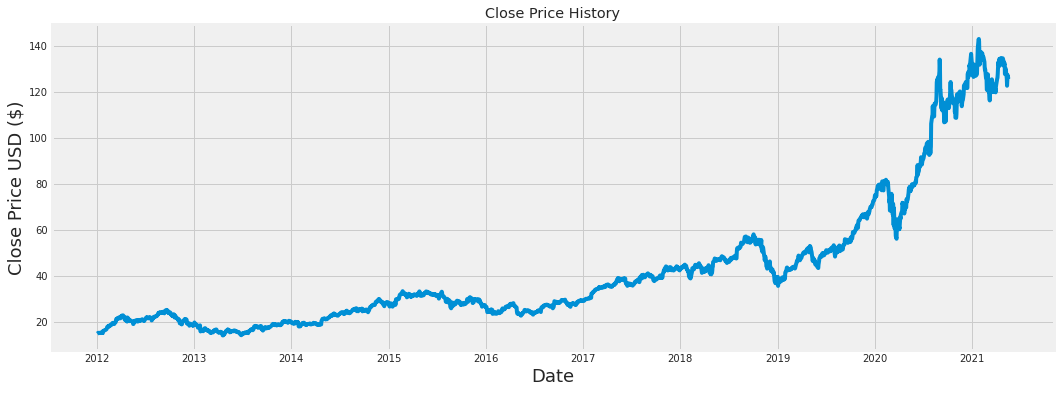

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Deployment 

In [ ]:
data = df.filter(['Close'])
dataset = data.values

2241

In [ ]:
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.85922413],
       [0.87841729],
       [0.86553159]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, batch_size=1, epochs=1)

2181/2181 [==============================] - 69s 30ms/step - loss: 0.0017


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.276206678535074

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


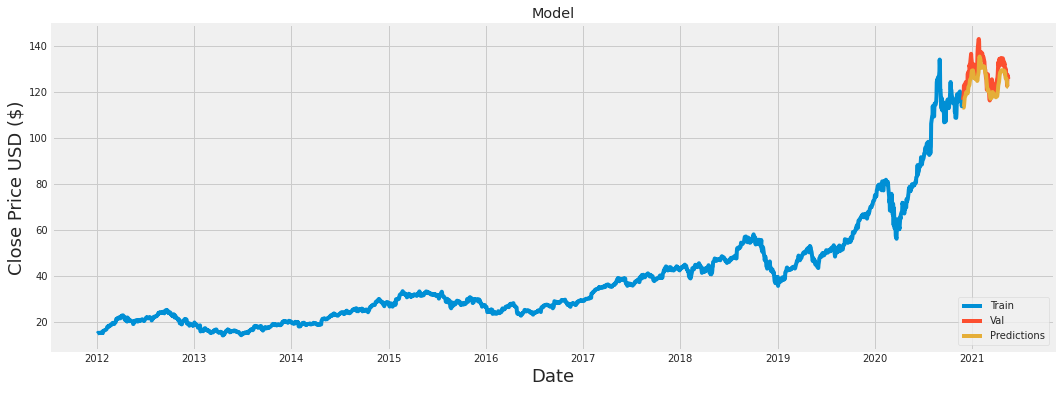

In [ ]:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()